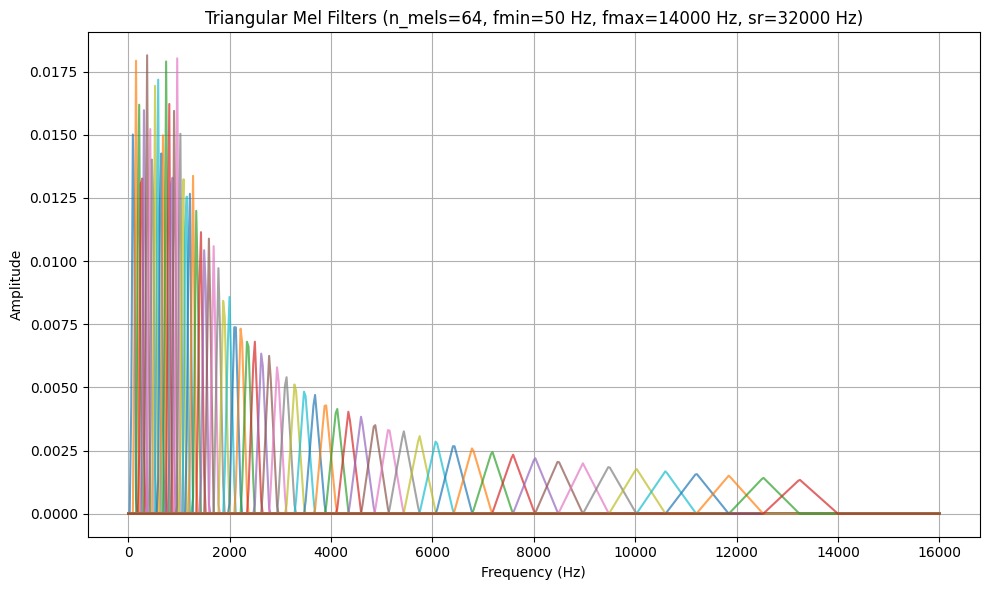

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Plot the triangular Mel filters with new settings
def plot_mel_filters_updated(sr=32000, n_mels=64, n_fft=1024, hop_length=320, fmin=50, fmax=14000):
    # Generate a Mel filter bank with the new settings
    mel_filters = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax)
    freqs = np.linspace(0, sr / 2, int(1 + n_fft // 2))

    # Plot the Mel filter bank (triangular filters)
    plt.figure(figsize=(10, 6))
    for i in range(mel_filters.shape[0]):
        plt.plot(freqs, mel_filters[i], label=f'Filter {i+1}', alpha=0.7)
    
    plt.title(f'Triangular Mel Filters (n_mels={n_mels}, fmin={fmin} Hz, fmax={fmax} Hz, sr={sr} Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage with updated settings
plot_mel_filters_updated()


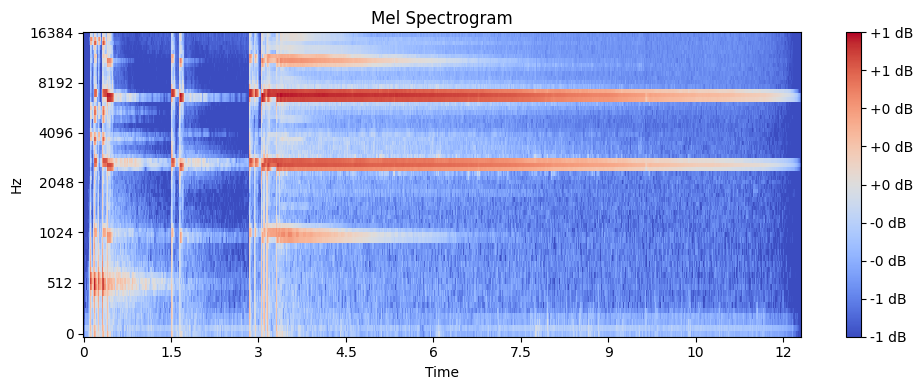

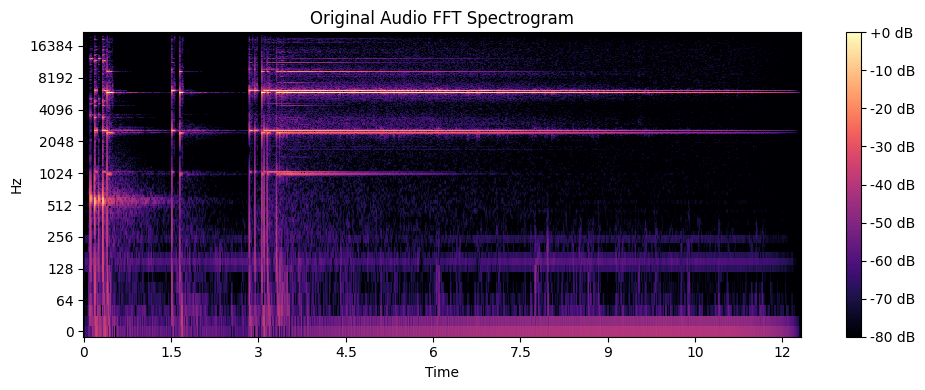

Original Audio:


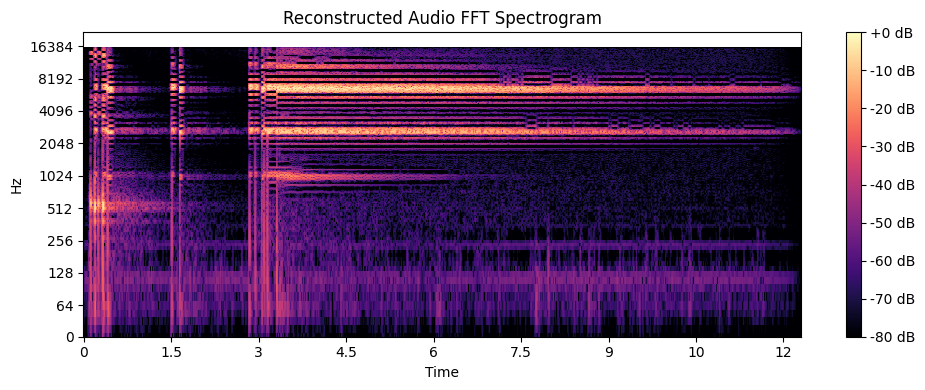

Reconstructed Audio:


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa.display import specshow
import soundfile as sf
from IPython.display import Audio, display

# Step 1: Load the original audio without resampling
def load_audio(filepath):
    audio, sr = librosa.load(filepath, sr=None)  # Load audio with original sampling rate
    return audio, sr

# Step 2: Resample audio to 32kHz for further processing
def resample_audio(audio, original_sr, target_sr=32000):
    resampled_audio = librosa.resample(audio, orig_sr=original_sr, target_sr=target_sr)
    return resampled_audio, target_sr

# Step 3: Generate Mel spectrogram with updated settings
def compute_mel_spectrogram(audio, sr, n_mels=64, win_length=1024, hop_length=320, fmin=50, fmax=14000):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels,
                                                     n_fft=win_length, hop_length=hop_length,
                                                     fmin=fmin, fmax=fmax)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return log_mel_spectrogram, hop_length

# Step 4: Normalize spectrogram between -1 and 1
def normalize_spectrogram(spectrogram):
    normalized_spectrogram = 2 * (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram)) - 1
    return normalized_spectrogram

# Step 5: Plot the spectrogram
def plot_spectrogram(spectrogram, sr, hop_length, title="Mel Spectrogram"):
    plt.figure(figsize=(10, 4))
    specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

# Step 6: Reconstruct audio from Mel spectrogram (approximation)
def reconstruct_audio_from_mel(mel_spectrogram, sr, win_length=1024, hop_length=320):
    mel_spectrogram_db = librosa.db_to_power(mel_spectrogram)
    recovered_audio = librosa.feature.inverse.mel_to_audio(mel_spectrogram_db, sr=sr,
                                                           n_fft=win_length, hop_length=hop_length)
    return recovered_audio

# Step 7: Plot FFT spectrogram
def plot_fft_spectrogram(audio, sr, title="FFT Spectrogram", y_axis_resolution="log", max_freq=None):
    D = np.abs(librosa.stft(audio))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis=y_axis_resolution, cmap='magma')
    
    if max_freq:
        plt.ylim(0, max_freq)
    
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Step 8: Add IPython Audio player
def play_audio(audio, sr, title="Audio"):
    print(f"{title}:")
    display(Audio(audio, rate=sr))

# Example usage
filepath = 'parm_de_nat1.wav'

# Load the original audio
original_audio, original_sr = load_audio(filepath)

# Resample the audio to 32kHz for further processing
resampled_audio, resampled_sr = resample_audio(original_audio, original_sr)

# Compute Mel spectrogram
mel_spectrogram, hop_length = compute_mel_spectrogram(resampled_audio, resampled_sr)
normalized_spectrogram = normalize_spectrogram(mel_spectrogram)

# Plot the normalized Mel spectrogram
plot_spectrogram(normalized_spectrogram, resampled_sr, hop_length)

# Reconstruct the audio (approximation)
reconstructed_audio = reconstruct_audio_from_mel(mel_spectrogram, resampled_sr)

# Save the reconstructed audio
sf.write('reconstructed_audio.wav', reconstructed_audio, resampled_sr)

# Plot FFT spectrogram for the original and reconstructed audio
plot_fft_spectrogram(original_audio, original_sr, title="Original Audio FFT Spectrogram", y_axis_resolution="log")
play_audio(original_audio, original_sr, title="Original Audio")

plot_fft_spectrogram(reconstructed_audio, resampled_sr, title="Reconstructed Audio FFT Spectrogram", y_axis_resolution="log", max_freq=22050)
play_audio(reconstructed_audio, resampled_sr, title="Reconstructed Audio")
